In [51]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import numpy as np
# Scalers
from sklearn.preprocessing import StandardScaler
# Clustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans


In [52]:
df = pd.read_excel('../data/WonderfulWinesoftheWorld.xlsx', index_col=0)

In [53]:
df.drop(df.tail(1).index,inplace=True)

In [54]:
client_features = ['Dayswus', 'Age', 'Edu', 'Income', 'Freq', 'Recency', 'Monetary', 'LTV',
       'Perdeal', 'WebPurchase', 'WebVisit']

product_features = ['Dryred', 'Sweetred', 'Drywh', 'Sweetwh', 'Dessert',
       'Exotic']

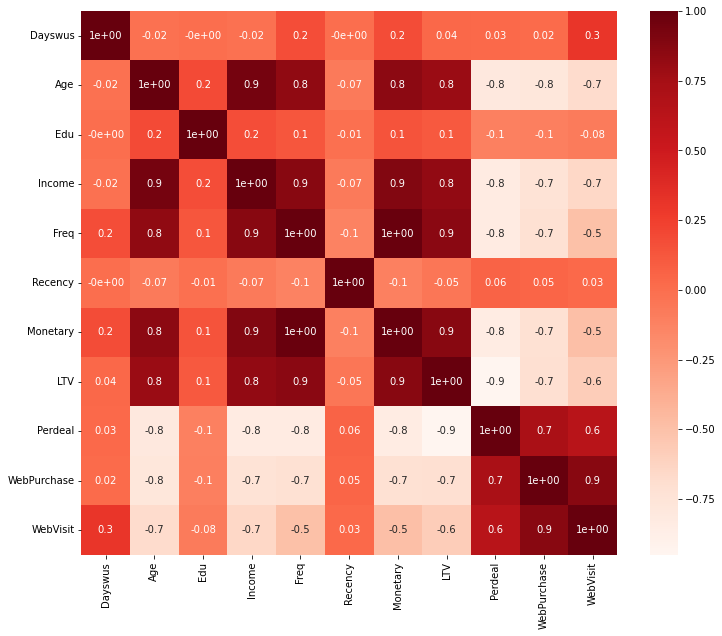

In [55]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df[client_features].corr(method="spearman"), decimals=2)


cor_heatmap(corr)

Age -> Income, perdeal, webp, webv
Income -> Age, Freq, Monetary, LTV, perdeal, webp, webv 
Freq -> Age, Income, Monetary, LTV, perdeal, webp
Perdeal -> Age, Income, Freq, Monetary, LTV, Webp, webv
Webp-> Age, Income, Freq, Monetary, LTV, Webp, webv
Webv-> Age, Income, LTV, Webp, webv

In [56]:
'Income','Perdeal','WebPurchase'

('Income', 'Perdeal', 'WebPurchase')

In [57]:
scaled_df = df.copy()
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(df[client_features+product_features])
scaled_df[client_features+product_features] = scaled_feat
scaled_df.head()


,Dayswus,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit
Custid,,,,,,,,,,,,,,,,,
5325.0,-1.210484,0.408783,1.737959,0.310336,0.448837,-0.635556,0.314393,0.808054,-0.910434,0.708547,-0.388309,-0.200368,-0.632564,-0.754827,-0.901419,-0.344266,-0.092948
3956.0,0.705730,1.564728,0.672021,1.274232,1.785683,-0.420874,1.899921,1.130004,-1.089673,-0.058957,-0.896817,1.389036,-0.757335,-0.500993,-0.959401,-1.208144,-0.522070
3681.0,-1.146281,-1.729716,-2.525794,-1.518257,-0.888008,-0.091695,-0.901797,-0.740042,1.993239,-1.977717,2.789865,-1.154011,3.110566,1.783517,1.823723,0.951551,1.194418
2829.0,0.745239,-0.342582,-0.393917,-0.295404,-1.055114,-0.234816,-0.904887,-0.736617,1.347978,1.518690,-0.769690,-1.392422,-0.757335,-0.754827,2.229595,0.897558,0.765296
8788.0,-0.301764,-0.053595,-0.393917,-0.149049,-1.055114,-0.850238,-0.906433,-0.702367,0.093305,1.476051,-0.896817,-1.312952,-0.632564,-0.754827,0.664088,1.113528,0.336174


In [58]:
def kMeansRes(scaled_data, k, alpha_k=0.02):
    '''
    Parameters 
    ----------
    scaled_data: matrix 
        scaled data. rows are samples and columns are features for clustering
    k: int
        current k for applying KMeans
    alpha_k: float
        manually tuned factor that gives penalty to the number of clusters
    Returns 
    -------
    scaled_inertia: float
        scaled inertia value for current k           
    '''
    
    inertia_o = np.square((scaled_data - scaled_data.mean(axis=0))).sum()
    # fit k-means
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    scaled_inertia = kmeans.inertia_ / inertia_o + alpha_k * k
    return scaled_inertia

def chooseBestKforKMeans(scaled_data, k_range):
    ans = []
    for k in k_range:
        scaled_inertia = kMeansRes(scaled_data, k)
        ans.append((k, scaled_inertia))
    results = pd.DataFrame(ans, columns = ['k','Scaled Inertia']).set_index('k')
    best_k = results.idxmin()[0]
    return best_k, results

C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\A

([<matplotlib.axis.XTick at 0x2c847f51640>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

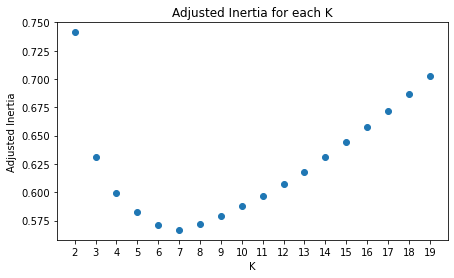

In [59]:
data_matrix = np.matrix(scaled_df).astype(float)

# choose k range
k_range=range(2,20)
# compute adjusted intertia
best_k, results = chooseBestKforKMeans(data_matrix, k_range)

# plot the results
plt.figure(figsize=(7,4))
plt.plot(results,'o')
plt.title('Adjusted Inertia for each K')
plt.xlabel('K')
plt.ylabel('Adjusted Inertia')
plt.xticks(range(2,20,1))

In [60]:
important_features = ['Dayswus', 'Age', 'Edu', 'Freq', 'Recency', 'Monetary', 'LTV',
       'Dryred', 'Sweetred', 'Drywh', 'Sweetwh', 'Dessert',
       'Exotic',  'WebVisit']

In [65]:
#final cluster solution - KMEANS - Stardard Scaler
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(scaled_df[important_features])

# inserting in the dataset for visualization
km_St = pd.concat((scaled_df.reset_index(), pd.Series(km_labels, name='km_labels')), axis=1).set_index('Custid')
km_St.groupby('km_labels').mean()

,Dayswus,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit
km_labels,,,,,,,,,,,,,,,,,
0,0.047800,1.186530,0.043763,1.169022,1.281642,-0.172968,1.305443,1.318625,-1.020752,-0.273360,0.026596,0.484682,0.018471,-0.004329,-0.503067,-1.197195,-1.040522
1,-0.027979,-0.722663,-0.081647,-0.711647,-0.751188,0.206703,-0.723220,-0.660306,0.691021,-0.334521,-0.002665,0.647783,-0.032027,-0.000449,0.268768,0.630363,0.511445
2,-0.002317,-1.295173,-1.163525,-1.214034,-0.857661,0.290061,-0.806805,-0.677729,0.736673,-1.454655,1.501306,-0.183076,1.558515,1.540648,1.370166,0.688241,0.527391
3,-0.017022,0.068172,0.468670,0.043423,-0.154715,-0.129625,-0.216509,-0.326980,0.028475,1.049647,-0.588135,-0.860248,-0.579333,-0.578679,-0.309216,0.244504,0.268527


In [66]:
scaled_df

,Dayswus,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit
Custid,,,,,,,,,,,,,,,,,
5325.0,-1.210484,0.408783,1.737959,0.310336,0.448837,-0.635556,0.314393,0.808054,-0.910434,0.708547,-0.388309,-0.200368,-0.632564,-0.754827,-0.901419,-0.344266,-0.092948
3956.0,0.705730,1.564728,0.672021,1.274232,1.785683,-0.420874,1.899921,1.130004,-1.089673,-0.058957,-0.896817,1.389036,-0.757335,-0.500993,-0.959401,-1.208144,-0.522070
3681.0,-1.146281,-1.729716,-2.525794,-1.518257,-0.888008,-0.091695,-0.901797,-0.740042,1.993239,-1.977717,2.789865,-1.154011,3.110566,1.783517,1.823723,0.951551,1.194418
2829.0,0.745239,-0.342582,-0.393917,-0.295404,-1.055114,-0.234816,-0.904887,-0.736617,1.347978,1.518690,-0.769690,-1.392422,-0.757335,-0.754827,2.229595,0.897558,0.765296
8788.0,-0.301764,-0.053595,-0.393917,-0.149049,-1.055114,-0.850238,-0.906433,-0.702367,0.093305,1.476051,-0.896817,-1.312952,-0.632564,-0.754827,0.664088,1.113528,0.336174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383.0,1.155151,0.524377,1.737959,0.403053,0.365285,-0.048759,0.237126,-0.075594,-0.372717,1.177577,-0.896817,-0.677190,-0.757335,-0.754827,-0.321602,-0.830197,-0.522070
4070.0,-1.491989,1.044553,-0.926887,0.536370,0.281732,-0.249129,0.150586,0.623105,-0.982130,-0.869100,0.628706,0.594334,0.365604,0.641262,-0.205638,-1.316129,-1.380314
7909.0,-1.378399,-1.729716,-2.525794,-1.066188,-0.971561,0.037114,-0.889434,-0.698942,-0.336869,-1.892439,2.154230,-1.471892,3.859192,1.910434,1.417851,0.843566,-0.092948


In [67]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

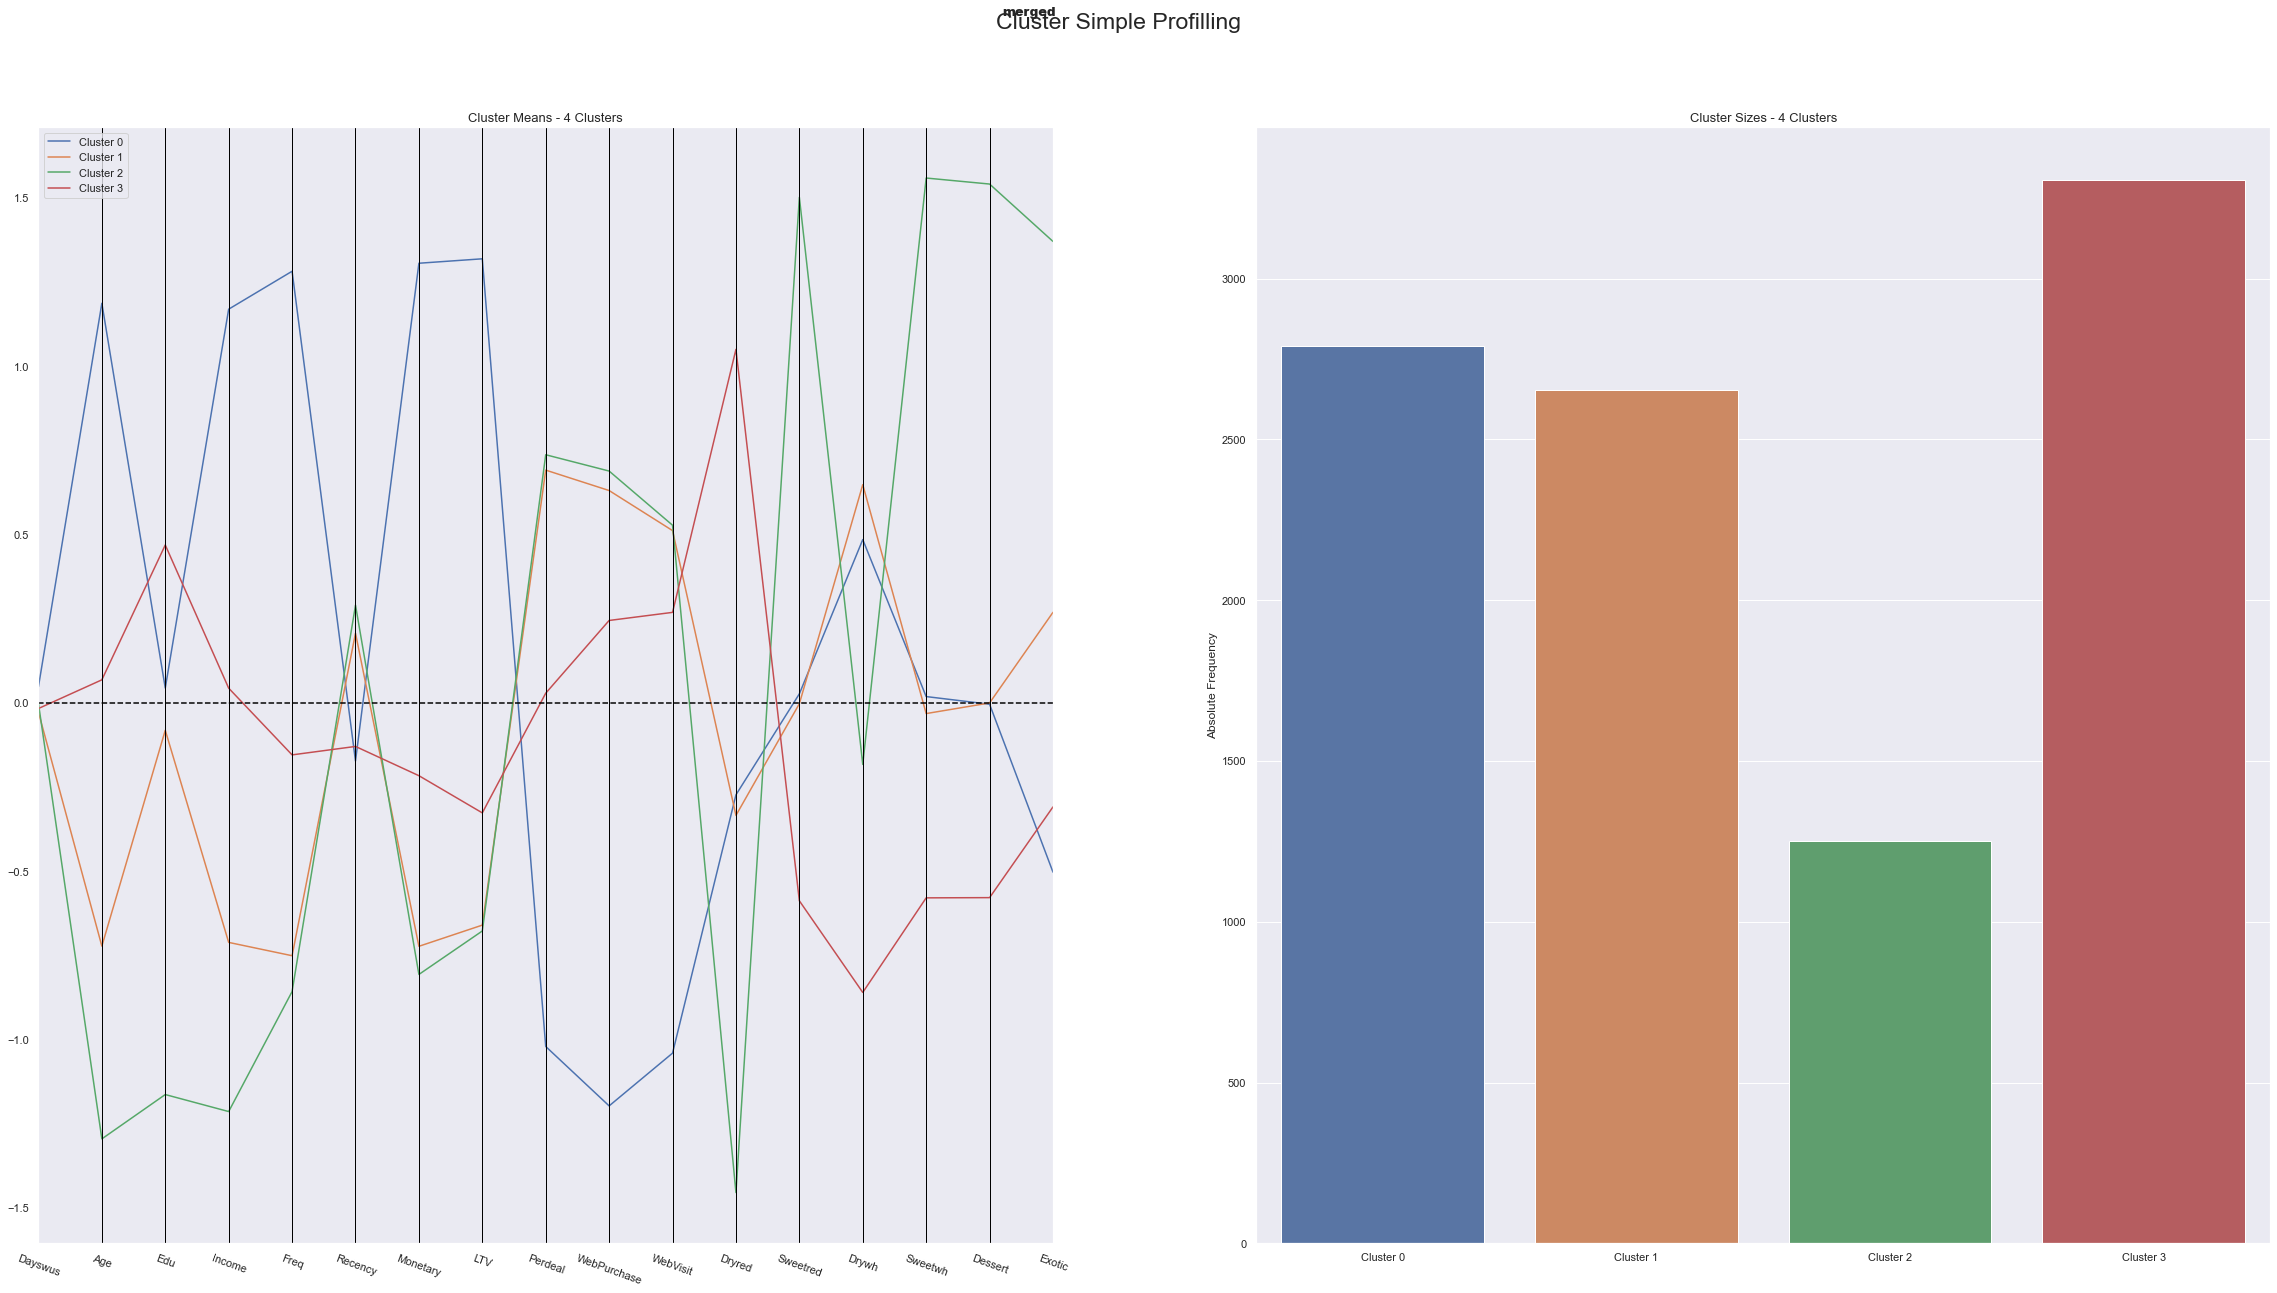

In [68]:
cluster_profiles(
    df = km_St[client_features+product_features + ['km_labels']], 
    label_columns = ['km_labels'], 
    figsize = (40, 20), 
    compar_titles = ["merged"]
)